In [2]:
from halo_nfw_model import HaloMap3D
import numpy as np
import h5py
import pandas as pd
import astropy.io.fits as fits
import matplotlib.pyplot as plt
import matplotlib.colors as colors

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [49]:
cat_path = '/Users/danny/Desktop/cos0_Set1_rotate1_area1.txt'
fits_path = '/Users/danny/Desktop/cos0_Set1_rotate1_area1_nfw.fits'
zcat_path = '/Users/danny/Desktop/WL/kappa_map/scripts/redshift_info.txt'
density_path = '/Users/danny/Desktop/cos0_Set1_rotate1_area1_Sigma2D.mat'

halo_cat = pd.read_csv(cat_path, sep='\t')
halo_cat.name = cat_path[:-4]
redshift_cat = pd.read_csv(zcat_path, sep=' ')
z_list = list(redshift_cat['z_lens'])

m = HaloMap3D(halo_cat, z_list)
m.data = fits.open(fits_path)[0].data

Text(0.5, 1.0, 'Halo Surface Mass Density Map ($\\mathrm{M}_{\\odot}\\mathrm{kpc}^{-2}$)\nz = 0.2364')

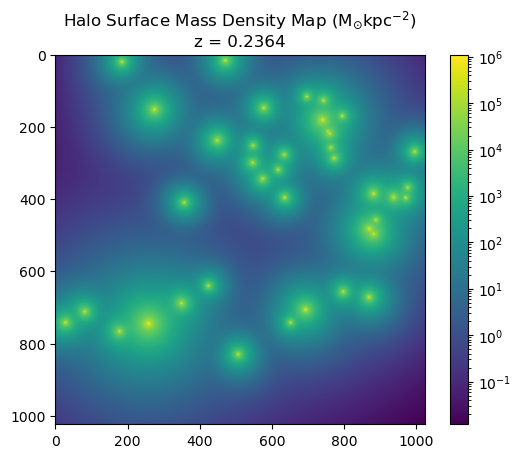

In [50]:
z_idx = 10
plt.imshow(m.data[z_idx].T, interpolation='None', norm=colors.LogNorm())
plt.colorbar()
plt.title(r'Halo Surface Mass Density Map ($\mathrm{M}_{\odot}\mathrm{kpc}^{-2}$)'+f'\nz = {z_list[z_idx]:.4}')

In [51]:
def load_mat_file_v73(file_path):
    with h5py.File(file_path, 'r') as f:
        variables = {}
        for k, v in f.items():
            variables[k] = np.array(v)
    return variables

density = load_mat_file_v73(density_path)['Sigma_2D']

/var/folders/cb/fs27ksbj131c_0qrcl46hk740000gn/T/ipykernel_88771/3894175148.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


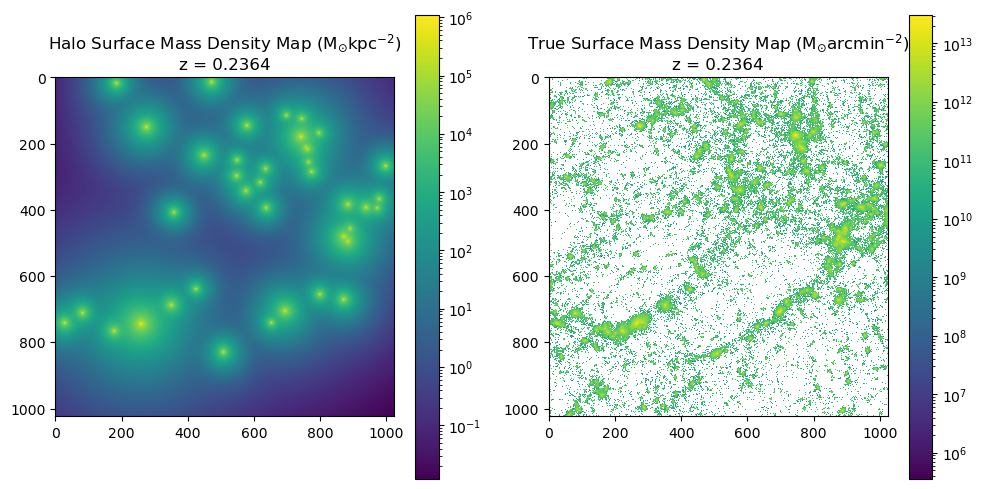

In [67]:
z_idx = 10
plt.subplots(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(m.data[z_idx].T, interpolation='None', norm=colors.LogNorm())
plt.colorbar()
plt.title(r'Halo Surface Mass Density Map ($\mathrm{M}_{\odot}\mathrm{kpc}^{-2}$)'+f'\nz = {z_list[z_idx]:.4}')
plt.subplot(1, 2, 2)
plt.imshow(np.flipud(density[z_idx]), interpolation='None', norm=colors.LogNorm())
plt.colorbar()
plt.title(r'True Surface Mass Density Map ($\mathrm{M}_{\odot}\mathrm{arcmin}^{-2}$)'+f'\nz = {z_list[z_idx]:.4}')
plt.tight_layout()

In [36]:
sum(np.flipud(density[z_idx]).flatten()) / sum(m.data[z_idx].flatten())

597.4922382337477